 ## STEP 1: GETTING DATA, EXPLORING AND ADDING A COLUMN

In [10]:
import pandas as pd
df=pd.read_excel("online_retail_II.xlsx")
df["Total_Amount"]=df["Quantity"]*df["Price"]
print(df)

        Invoice StockCode                          Description  Quantity  \
0        489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1        489434    79323P                   PINK CHERRY LIGHTS        12   
2        489434    79323W                  WHITE CHERRY LIGHTS        12   
3        489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4        489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...         ...       ...                                  ...       ...   
1048570  580501     23284        DOORMAT KEEP CALM AND COME IN         2   
1048571  580501     22507         MEMO BOARD RETROSPOT  DESIGN         3   
1048572  580502     22469                HEART OF WICKER SMALL         3   
1048573  580502     23489                VINTAGE BELLS GARLAND         2   
1048574  580502     23046    PAPER LANTERN 9 POINT DELUXE STAR         1   

                InvoiceDate  Price  Customer ID         Country  Total_Amount  
0      

FINDING NULL VALUES

In [11]:
print(df.isnull().sum())

Invoice              0
StockCode            0
Description       4372
Quantity             0
InvoiceDate          0
Price                0
Customer ID     236682
Country              0
Total_Amount         0
dtype: int64


DELETING NULL VALUES/MISSING VALUES

In [12]:
df.dropna(axis=0,inplace=True)



In [13]:
print(df.isnull().sum())


Invoice         0
StockCode       0
Description     0
Quantity        0
InvoiceDate     0
Price           0
Customer ID     0
Country         0
Total_Amount    0
dtype: int64


In [14]:
df.shape
df.describe()
df.columns.to_list()

['Invoice',
 'StockCode',
 'Description',
 'Quantity',
 'InvoiceDate',
 'Price',
 'Customer ID',
 'Country',
 'Total_Amount']

Remove obvious bad rows (returns, negatives, cancellations)

In [15]:
df = df[df['Total_Amount'] > 0]

Some datasets mark cancellations with InvoiceNo starting with 'C'


In [16]:
if df['Invoice'].dtype == object:
    df = df[~df['Invoice'].astype(str).str.startswith('C')]

In [17]:
print(df.head(10))



  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
5  489434     22064           PINK DOUGHNUT TRINKET POT         24   
6  489434     21871                  SAVE THE PLANET MUG        24   
7  489434     21523   FANCY FONT HOME SWEET HOME DOORMAT        10   
8  489435     22350                            CAT BOWL         12   
9  489435     22349       DOG BOWL , CHASING BALL DESIGN        12   

          InvoiceDate  Price  Customer ID         Country  Total_Amount  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom          83.4  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom          81.0  
2 2009-

Remove rows with NaT dates (if any)

In [18]:
df=df[~df['InvoiceDate'].isna()]

Fill the null values in customerid with unknown

In [19]:
df["Customer ID"]=df["Customer ID"].fillna("Unknown")

normalize the column names

In [20]:
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('-', '_')
df.columns.tolist()


['Invoice',
 'StockCode',
 'Description',
 'Quantity',
 'InvoiceDate',
 'Price',
 'Customer_ID',
 'Country',
 'Total_Amount']

CHANGING DTYPE OF 'INVOICEDATE' TO DATETIME

In [21]:
df["InvoiceDate"]=pd.to_datetime(df["InvoiceDate"])
print(df["InvoiceDate"].head(10))

0   2009-12-01 07:45:00
1   2009-12-01 07:45:00
2   2009-12-01 07:45:00
3   2009-12-01 07:45:00
4   2009-12-01 07:45:00
5   2009-12-01 07:45:00
6   2009-12-01 07:45:00
7   2009-12-01 07:45:00
8   2009-12-01 07:46:00
9   2009-12-01 07:46:00
Name: InvoiceDate, dtype: datetime64[ns]


In [22]:
df = df.drop_duplicates()


In [23]:
print("Total rows:", len(df))
print("Unique customers:", df['Customer_ID'].nunique())
print("Total sales:", df['Total_Amount'].sum())
print("Date range:", df['InvoiceDate'].min(), "to", df['InvoiceDate'].max())
print(df.isnull().sum())    # check remaining nulls


Total rows: 767369
Unique customers: 5860
Total sales: 16956900.948000003
Date range: 2009-12-01 07:45:00 to 2011-12-04 13:15:00
Invoice         0
StockCode       0
Description     0
Quantity        0
InvoiceDate     0
Price           0
Customer_ID     0
Country         0
Total_Amount    0
dtype: int64


In [24]:
df.to_excel(r"C:\Users\dhama\Desktop\RETAILPROJECT\cleaned_data.xlsx")



## Step 2: Basic Sales Analysis (EDA)

top 10 best-selling products?

In [ ]:
top_products=(df.groupby("Description")['Total_Amount'].sum().sort_values(ascending=False).head(10))
print(top_products)


Description
REGENCY CAKESTAND 3 TIER              273694.42
WHITE HANGING HEART T-LIGHT HOLDER    245488.77
Manual                                151350.21
JUMBO BAG RED RETROSPOT               133467.00
ASSORTED COLOUR BIRD ORNAMENT         123330.16
POSTAGE                               122527.04
PARTY BUNTING                         103030.93
MEDIUM CERAMIC TOP STORAGE JAR         81243.22
PAPER CHAIN KIT 50'S CHRISTMAS         73913.76
CHILLI LIGHTS                          67855.98
Name: Total_Amount, dtype: float64


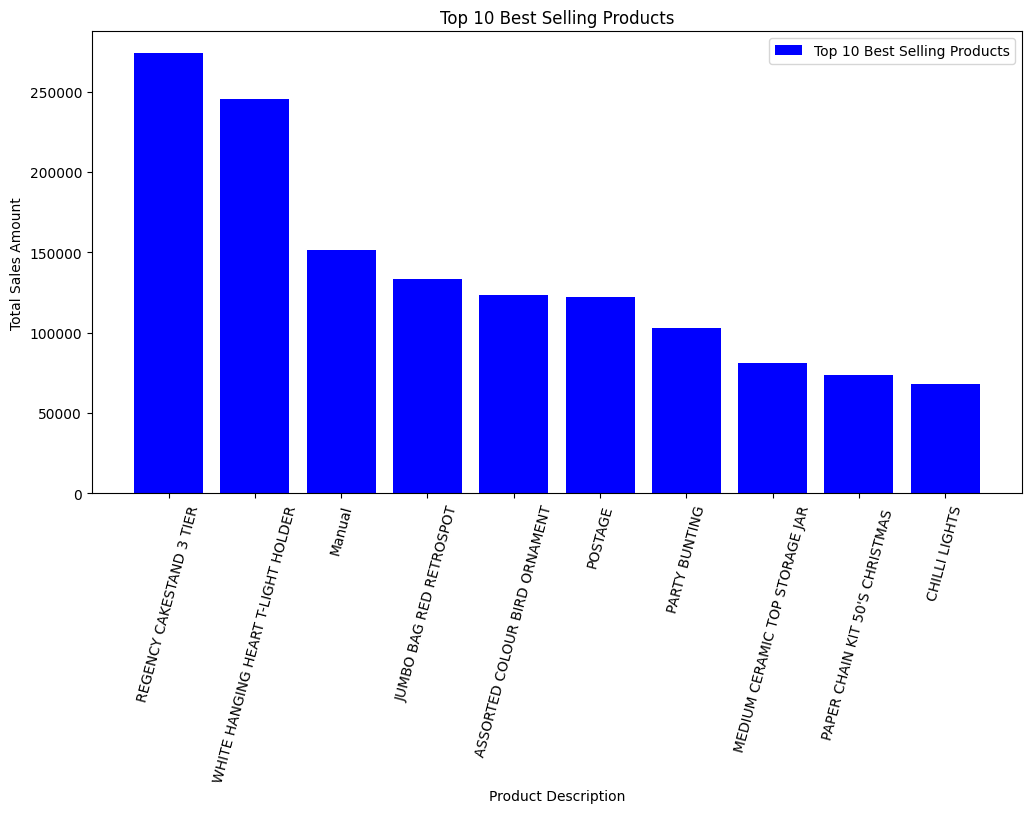

In [ ]:
import matplotlib.pyplot as plt
top_products = df.groupby("Description")["Total_Amount"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
plt.bar(top_products.index, top_products.values, color="blue", label="Top 10 Best Selling Products")
plt.xlabel("Product Description")
plt.ylabel("Total Sales Amount")
plt.title("Top 10 Best Selling Products")
plt.xticks(rotation=75)   
plt.legend()
plt.show()


 month had the highest sales?

In [ ]:
df["YearMonth"] = df["InvoiceDate"].dt.to_period("M")
month_highest_sale=(df.groupby("YearMonth")['Total_Amount'].sum().sort_values(ascending=False))
print(month_highest_sale)

YearMonth
2010-11    1134879.282
2011-11    1132407.740
2011-10     974603.590
2010-10     964989.780
2011-09     931440.372
2010-12     859227.370
2010-09     781033.301
2009-12     663272.050
2011-05     648251.080
2010-03     635996.481
2011-08     616368.000
2011-06     608013.160
2010-08     587256.460
2011-03     579964.610
2011-07     574238.481
2010-06     571459.910
2010-07     562785.900
2010-04     560635.022
2010-05     559924.550
2010-01     531952.902
2010-02     489399.586
2011-01     475074.380
2011-02     436546.150
2011-04     426047.851
2011-12      98329.290
Freq: M, Name: Total_Amount, dtype: float64


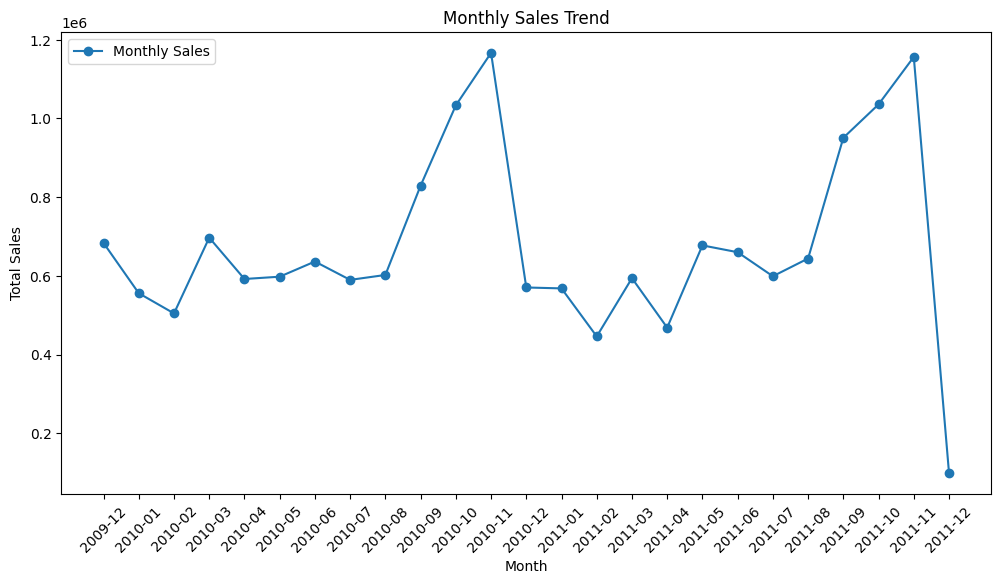

In [ ]:
import matplotlib.pyplot as plt
df["YearMonth"] = df["InvoiceDate"].dt.to_period("M")
monthly_sales = df.groupby("YearMonth")["Total_Amount"].sum()
plt.figure(figsize=(12,6))
plt.plot(monthly_sales.index.astype(str), monthly_sales.values, marker="o", label="Monthly Sales")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Monthly Sales Trend")
plt.xticks(rotation=45)
plt.legend()
plt.show()


customers spent the most money

In [ ]:
print(df.head(10))

  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
5  489434     22064           PINK DOUGHNUT TRINKET POT         24   
6  489434     21871                  SAVE THE PLANET MUG        24   
7  489434     21523   FANCY FONT HOME SWEET HOME DOORMAT        10   
8  489435     22350                            CAT BOWL         12   
9  489435     22349       DOG BOWL , CHASING BALL DESIGN        12   

          InvoiceDate  Price  Customer ID         Country  Total_Amount  \
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom          83.4   
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom          81.0   
2 20

In [ ]:
top_customers =(df.groupby("Customer ID")["Total_Amount"].sum().sort_values(ascending=False).head(10))
print(top_customers)

Customer ID
18102.0    586729.68
14646.0    511614.05
14156.0    296564.69
14911.0    263946.56
17450.0    233579.39
13694.0    187694.36
17511.0    164506.66
12415.0    143269.29
16684.0    136100.27
15061.0    132495.62
Name: Total_Amount, dtype: float64


Country which generates most revenue

In [ ]:
high_revenue_country=(df.groupby("Country")["Total_Amount"].sum().sort_values(ascending=False).head(10))
print(high_revenue_country)

Country
United Kingdom    1.400996e+07
EIRE              6.102686e+05
Netherlands       5.423101e+05
Germany           4.177984e+05
France            3.439847e+05
Australia         1.692835e+05
Spain             1.080163e+05
Switzerland       1.000619e+05
Sweden            9.127782e+04
Denmark           6.841179e+04
Name: Total_Amount, dtype: float64


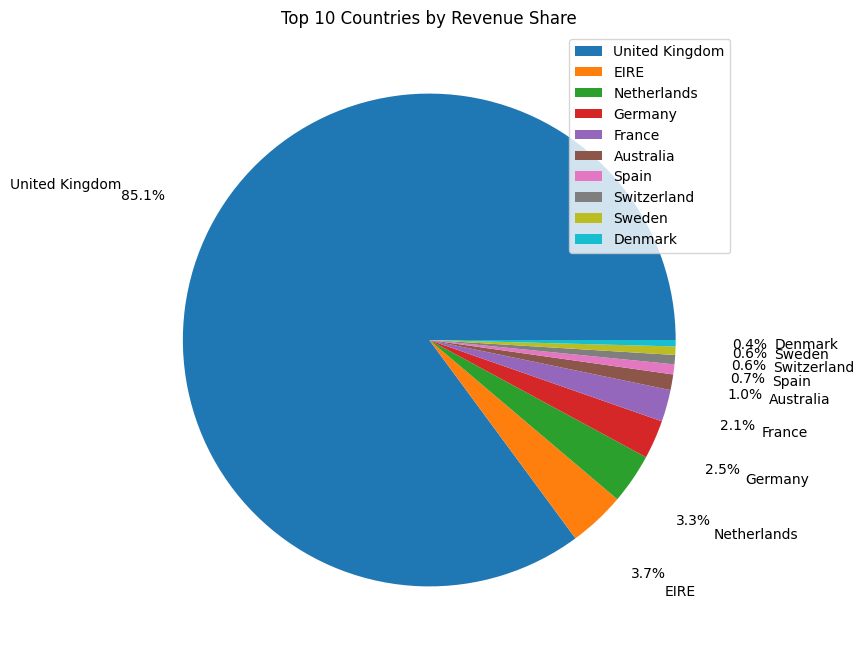

In [ ]:
import matplotlib.pyplot as plt
high_revenue_country = df.groupby("Country")["Total_Amount"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,8))
plt.pie(high_revenue_country.values,labels=high_revenue_country.index, autopct='%1.1f%%', colors=plt.cm.tab10.colors,pctdistance=1.3,labeldistance=1.4)
plt.title("Top 10 Countries by Revenue Share")
plt.legend()
plt.show()


average basket size i.e how much do an customer spend in one order

In [ ]:
avg_bskt_per_order=(df.groupby("Invoice")["Total_Amount"].sum().mean())
print(avg_bskt_per_order)

465.12057898345995


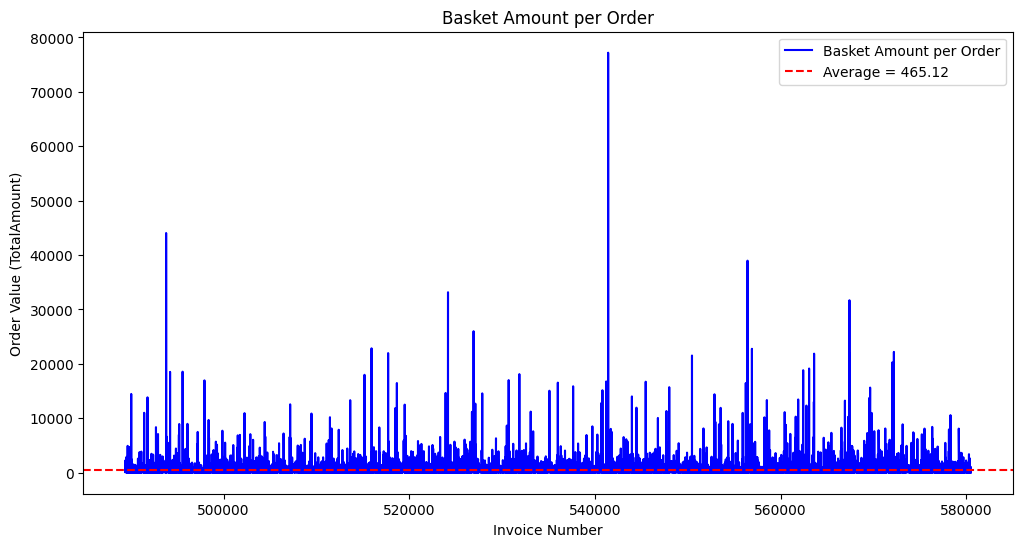

In [ ]:
import matplotlib.pyplot as plt
basket_size = df.groupby("Invoice")["Total_Amount"].sum()
plt.figure(figsize=(12,6))
plt.plot(basket_size.index, basket_size.values, color="blue", label="Basket Amount per Order")
avg_bskt = basket_size.mean()
plt.axhline(y=avg_bskt, color="red", linestyle="--", label=f"Average = {avg_bskt:.2f}")

plt.xlabel("Invoice Number")
plt.ylabel("Order Value (TotalAmount)")
plt.title("Basket Amount per Order")
plt.legend()
plt.show()


## RFM ANALYSIS

RECENCY-->the amount of days between the last purchase and most frequent purchase,i.e if less recency days then more recent customer

In [ ]:
import pandas as pd
df_recency = df.groupby('Customer_ID', as_index=False)['InvoiceDate'].max()
df_recency.columns = ['Customer_ID', 'LastPurchaseDate']
most_recent_date = df_recency['LastPurchaseDate'].max()
df_recency['Recency'] = (most_recent_date - df_recency['LastPurchaseDate']).dt.days

df_recency.head()


,Customer_ID,LastPurchaseDate,Recency
0,12346.0,2011-01-18 10:01:00,320
1,12347.0,2011-10-31 12:25:00,34
2,12348.0,2011-09-25 13:13:00,70
3,12349.0,2011-11-21 09:51:00,13
4,12350.0,2011-02-02 16:01:00,304


Frequency--> how many orders a customer has placed.
It tells you how often the customer buys.
Customers with high frequency = very engaged / loyal.
Customers with low frequency = occasional or one-time buyers.

In [33]:
import pandas as pd
df_frequency=df.groupby("Customer_ID",as_index=False)["Invoice"].nunique()
df_frequency.columns=["Customer_ID","Frequency"]
print(df_frequency)

      Customer_ID  Frequency
0         12346.0         12
1         12347.0          7
2         12348.0          5
3         12349.0          4
4         12350.0          1
...           ...        ...
5855      18283.0         21
5856      18284.0          1
5857      18285.0          1
5858      18286.0          2
5859      18287.0          7

[5860 rows x 2 columns]


Monetary-->amount of money one customer spends,more monetary=loyal customer

In [37]:
import pandas as pd
df_monetary=df.groupby("Customer_ID", as_index=False)["Total_Amount"].sum()
df_monetary.columns=["Customer_ID","Monetary"]
print(df_monetary)

      Customer_ID  Monetary
0         12346.0  77556.46
1         12347.0   4696.71
2         12348.0   2019.40
3         12349.0   4428.69
4         12350.0    334.40
...           ...       ...
5855      18283.0   2456.90
5856      18284.0    461.68
5857      18285.0    427.00
5858      18286.0   1296.43
5859      18287.0   4182.99

[5860 rows x 2 columns]


In [39]:
rfm = df_recency.merge(df_frequency, on="Customer_ID")
rfm = rfm.merge(df_monetary, on="Customer_ID")
print(rfm.head(10))


   Customer_ID    LastPurchaseDate  Recency  Frequency  Monetary
0      12346.0 2011-01-18 10:01:00      320         12  77556.46
1      12347.0 2011-10-31 12:25:00       34          7   4696.71
2      12348.0 2011-09-25 13:13:00       70          5   2019.40
3      12349.0 2011-11-21 09:51:00       13          4   4428.69
4      12350.0 2011-02-02 16:01:00      304          1    334.40
5      12351.0 2010-11-29 15:23:00      369          1    300.93
6      12352.0 2011-11-03 14:37:00       30         10   2849.84
7      12353.0 2011-05-19 17:47:00      198          2    406.76
8      12354.0 2011-04-21 13:11:00      227          1   1079.40
9      12355.0 2011-05-09 13:49:00      208          2    947.61


In [40]:
rfm["R_Score"] = pd.qcut(rfm["Recency"], 5, labels=[5,4,3,2,1])
rfm["F_Score"] = pd.qcut(rfm["Frequency"].rank(method="first"), 5, labels=[1,2,3,4,5])
rfm["M_Score"] = pd.qcut(rfm["Monetary"], 5, labels=[1,2,3,4,5])


In [41]:
rfm["RFM_Score"] = rfm["R_Score"].astype(str) + rfm["F_Score"].astype(str) + rfm["M_Score"].astype(str)


In [47]:
def segment(rfm):
    if rfm["RFM_Score"] == "555":
        return "Champions"
    elif rfm["R_Score"] in ["4","5"] and rfm["F_Score"] in ["4","5"]:
        return "Loyal Customers"
    elif rfm["R_Score"] in ["1","2"] and rfm["M_Score"] in ["4","5"]:
        return "At Risk"
    else:
        return "Others"

rfm["Segment"] = rfm.apply(segment, axis=1)
print(rfm.head(10))

   Customer_ID    LastPurchaseDate  Recency  Frequency  Monetary R_Score  \
0      12346.0 2011-01-18 10:01:00      320         12  77556.46       2   
1      12347.0 2011-10-31 12:25:00       34          7   4696.71       4   
2      12348.0 2011-09-25 13:13:00       70          5   2019.40       3   
3      12349.0 2011-11-21 09:51:00       13          4   4428.69       5   
4      12350.0 2011-02-02 16:01:00      304          1    334.40       2   
5      12351.0 2010-11-29 15:23:00      369          1    300.93       2   
6      12352.0 2011-11-03 14:37:00       30         10   2849.84       4   
7      12353.0 2011-05-19 17:47:00      198          2    406.76       2   
8      12354.0 2011-04-21 13:11:00      227          1   1079.40       2   
9      12355.0 2011-05-09 13:49:00      208          2    947.61       2   

  F_Score M_Score RFM_Score Segment  
0       5       5       255  Others  
1       4       5       445  Others  
2       4       4       344  Others  
3       3  

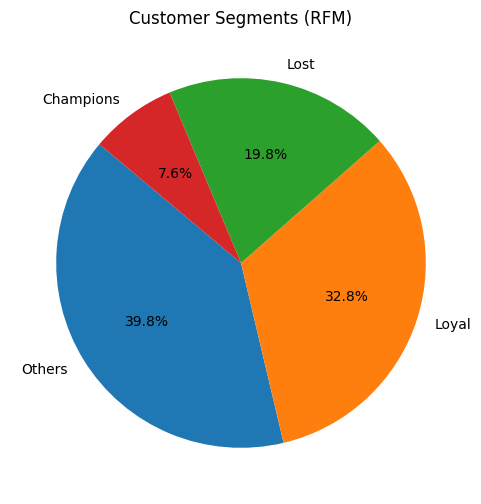

In [48]:
import matplotlib.pyplot as plt
def segment(score):
    if score == "555":
        return "Champions"
    elif score.startswith("5") or score.startswith("4"):
        return "Loyal"
    elif score.startswith("1"):
        return "Lost"
    else:
        return "Others"

rfm["Segment"] = rfm["RFM_Score"].apply(segment)

# Count customers per segment
segment_counts = rfm["Segment"].value_counts()

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(segment_counts, labels=segment_counts.index, autopct="%1.1f%%", startangle=140)
plt.title("Customer Segments (RFM)")
plt.show()



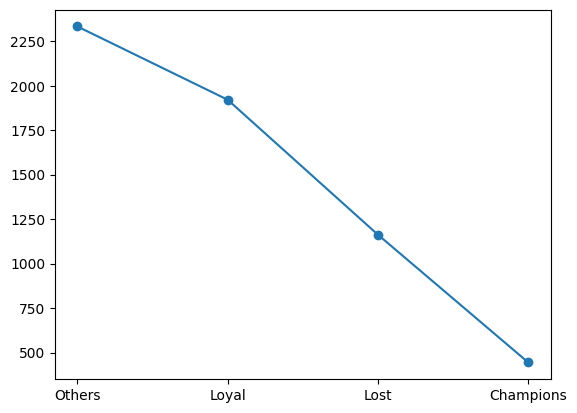

In [51]:
import matplotlib.pyplot as plt
def segment(score):
    if score == "555":
        return "Champions"
    elif score.startswith("5") or score.startswith("4"):
        return "Loyal"
    elif score.startswith("1"):
        return "Lost"
    else:
        return "Others"
rfm["Segment"] = rfm["RFM_Score"].apply(segment)
segment_counts = rfm["Segment"].value_counts()
plt.plot(segment_counts.index,segment_counts.values,marker="o")
plt.show()

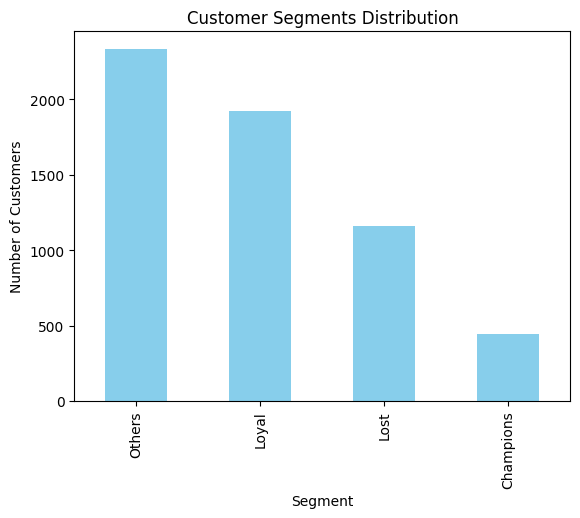

In [52]:
segment_counts.plot(kind="bar", color="skyblue")
plt.title("Customer Segments Distribution")
plt.xlabel("Segment")
plt.ylabel("Number of Customers")
plt.show()


In [53]:
segment_counts = rfm["Segment"].value_counts()
print(segment_counts)

Segment
Others       2333
Loyal        1921
Lost         1162
Champions     444
Name: count, dtype: int64


In [54]:
revenue_per_segment = rfm.groupby('Segment')['Monetary'].sum()
print(revenue_per_segment)

Segment
Champions    7850911.294
Lost          837717.522
Loyal        4704142.103
Others       3564130.029
Name: Monetary, dtype: float64


In [55]:
rfm.to_csv("rfm_segmented_customers.csv", index=False)


In [56]:
! pip install streamlit


  Using cached attrs-25.3.0-py3-none-any.whl.metadata (10 kB)
  Using cached referencing-0.36.2-py3-none-any.whl.metadata (2.8 kB)
   ---------------------------------------- 0.0/10.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/10.0 MB ? eta -:--:--
   --- ------------------------------------ 0.8/10.0 MB 1.8 MB/s eta 0:00:06
   ---- ----------------------------------- 1.0/10.0 MB 1.9 MB/s eta 0:00:05
   ------- -------------------------------- 1.8/10.0 MB 2.2 MB/s eta 0:00:04
   --------- ------------------------------ 2.4/10.0 MB 2.3 MB/s eta 0:00:04
   ---------- ----------------------------- 2.6/10.0 MB 2.3 MB/s eta 0:00:04
   ------------ --------------------------- 3.1/10.0 MB 2.3 MB/s eta 0:00:04
   -------------- ------------------------- 3.7/10.0 MB 2.3 MB/s eta 0:00:03
   ---------------- ----------------------- 4.2/10.0 MB 2.4 MB/s eta 0:00:03
   ------------------ --------------------- 4.7/10.0 MB 2.4 MB/s eta 0:00:03
   -------------------- ------------

In [57]:

import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

st.set_page_config(page_title="Retail Sales Dashboard", layout="wide")
st.title("Retail Sales Analysis & Customer Segmentation Dashboard")

# -----------------------------
# Load Dataset
# -----------------------------
st.markdown("### Upload your dataset (Excel/CSV)")
uploaded_file = st.file_uploader("Choose a file", type=["xlsx", "csv"])

if uploaded_file:
    if uploaded_file.name.endswith(".xlsx"):
        df = pd.read_excel(uploaded_file)
    else:
        df = pd.read_csv(uploaded_file)

    st.success("Dataset loaded successfully!")
    st.write("Sample of raw data:")
    st.dataframe(df.head())

    # -----------------------------
    # Data Cleaning
    # -----------------------------
    df['Total_Amount'] = df['Quantity'] * df['Price']
    df = df[df['Total_Amount'] > 0]
    df = df.dropna(subset=['CustomerID', 'InvoiceDate'])
    st.markdown("### Data Cleaning Summary")
    st.write(f"Number of rows after cleaning: {df.shape[0]}")
    st.dataframe(df.head())

    # -----------------------------
    # EDA Section
    # -----------------------------
    st.header("Exploratory Data Analysis (EDA)")

    # 1️⃣ Top 10 Best-Selling Products
    st.subheader("Top 10 Best-Selling Products")
    top_products = df.groupby("Description")['Total_Amount'].sum().sort_values(ascending=False).head(10)
    st.bar_chart(top_products)

    # 2️⃣ Monthly Sales
    st.subheader("Monthly Sales")
    df["YearMonth"] = df["InvoiceDate"].dt.to_period("M")
    monthly_sales = df.groupby("YearMonth")['Total_Amount'].sum()
    st.line_chart(monthly_sales)
    top_month = monthly_sales.idxmax()
    st.write(f"Month with highest sales: {top_month}")

    # 3️⃣ Top 10 Customers by Spend
    st.subheader("Top 10 Customers by Spend")
    top_customers = df.groupby("CustomerID")['Total_Amount'].sum().sort_values(ascending=False).head(10)
    st.bar_chart(top_customers)

    # 4️⃣ Revenue by Country
    st.subheader("Top 10 Countries by Revenue")
    revenue_country = df.groupby("Country")['Total_Amount'].sum().sort_values(ascending=False)
    st.bar_chart(revenue_country.head(10))
    st.write(f"Country with highest revenue: {revenue_country.idxmax()}")

    # 5️⃣ Average Basket Size
    st.subheader("Average Basket Size (per Order)")
    avg_basket = df.groupby("Invoice")['Total_Amount'].sum().mean()
    st.write(f"Average basket size: ₹{avg_basket:.2f}")

    # -----------------------------
    # RFM Analysis
    # -----------------------------
    st.header("Customer Segmentation using RFM Analysis")

    # Recency
    df_recency = df.groupby('CustomerID', as_index=False)['InvoiceDate'].max()
    df_recency.columns = ['CustomerID', 'LastPurchaseDate']
    most_recent_date = df_recency['LastPurchaseDate'].max()
    df_recency['Recency'] = (most_recent_date - df_recency['LastPurchaseDate']).dt.days

    # Frequency
    df_frequency = df.groupby('CustomerID', as_index=False)['Invoice'].nunique()
    df_frequency.columns = ['CustomerID', 'Frequency']

    # Monetary
    df_monetary = df.groupby('CustomerID', as_index=False)['Total_Amount'].sum()
    df_monetary.columns = ['CustomerID', 'Monetary']

    # Combine RFM
    rfm = df_recency.merge(df_frequency, on="CustomerID").merge(df_monetary, on="CustomerID")

    # RFM Scoring
    rfm["R_Score"] = pd.qcut(rfm["Recency"], 5, labels=[5,4,3,2,1])
    rfm["F_Score"] = pd.qcut(rfm["Frequency"].rank(method="first"), 5, labels=[1,2,3,4,5])
    rfm["M_Score"] = pd.qcut(rfm["Monetary"], 5, labels=[1,2,3,4,5])
    rfm["RFM_Score"] = rfm["R_Score"].astype(str) + rfm["F_Score"].astype(str) + rfm["M_Score"].astype(str)

    # Customer Segmentation
    def segment_customer(score):
        if score == "555":
            return "Champions"
        elif score.startswith("5") or score.startswith("4"):
            return "Loyal"
        elif score.startswith("1"):
            return "Lost"
        else:
            return "Others"

    rfm["Segment"] = rfm["RFM_Score"].apply(segment_customer)

    st.subheader("RFM Table Sample")
    st.dataframe(rfm.head())

    # -----------------------------
    # Segment Visualization
    # -----------------------------
    st.subheader("Customer Segment Distribution")
    segment_counts = rfm["Segment"].value_counts()

    # Bar chart
    st.bar_chart(segment_counts)

    # Pie chart
    fig, ax = plt.subplots()
    ax.pie(segment_counts, labels=segment_counts.index, autopct="%1.1f%%", startangle=140)
    st.pyplot(fig)

    # -----------------------------
    # Download RFM Table
    # -----------------------------
    csv = rfm.to_csv(index=False).encode()
    st.download_button(
        label="Download RFM Table",
        data=csv,
        file_name="rfm_segmented_customers.csv",
        mime="text/csv"
    )


2025-09-17 18:47:54.323 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-17 18:47:54.324 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-17 18:47:54.466 
  command:

    streamlit run C:\Users\dhama\AppData\Roaming\Python\Python310\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-09-17 18:47:54.467 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-17 18:47:54.468 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-17 18:47:54.469 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-17 18:47:54.470 Thread 'MainThread': missing ScriptRunContext! This warning can b